<a href="https://colab.research.google.com/github/YazCodes/diabetes-prediction-DL/blob/main/diabetesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder #need to convert labels - strings into boolean values etc 
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

from sklearn import metrics

In [16]:

#Load training data 
df_train = pd.read_csv("/content/drive/MyDrive/hospitaltrain (1).csv")

#Load test data
df_test = pd.read_csv("/content/drive/MyDrive/hospitaltest (1).csv")

print(f'Number of entries: {len(df_train)}')
df_train.head()

Number of entries: 668


,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [17]:
#data set inforation

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   Class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


In [18]:
df_train.describe()

,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,334.500000,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,192.979273,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,167.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,334.500000,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,501.250000,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,668.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


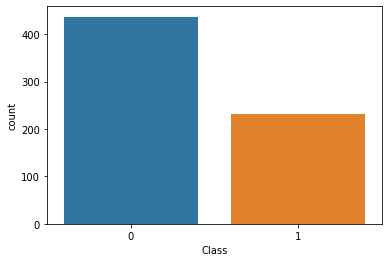

In [20]:
# Summarise class details
sns.countplot(x=df_train['Class'])
#Class - 0 or 1 (1= tested positive for diabetes)

In [26]:
#Data pre-processing 
df_train.isnull().values.any() #No missing values 
#The data has a lot of 0 values. But it is not appropriate to use data cleaning to replace the 0 values in the A5 column. 
#As the A5 column represents the amount of insulin a patient has it would be wrong of us to replace the 0 values with a mean value. 
#We don't want to alter patient records.

#removing unnecessary columns
#x is training data it contains features and models - 'Class' is something we need to PREDICT therefore we need to drop that column 
X = df_train.drop(['Id', 'Class'], axis=1) #Class is not a feature it's just a label  axis = 1 shows we are using columns 
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      668 non-null    int64  
 1   A2      668 non-null    int64  
 2   A3      668 non-null    int64  
 3   A4      668 non-null    int64  
 4   A5      668 non-null    int64  
 5   A6      668 non-null    float64
 6   A7      668 non-null    float64
 7   A8      668 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 41.9 KB
None


,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [23]:
#Extracting labels and features 

#Extracting labels 
y= df_train['Class']
print(y.value_counts())

0    437
1    231
Name: Class, dtype: int64


In [ ]:
#Since the labels 0 and 1 are already are numerical values they do not need to be converted for the model.
#If the labels were in a catergorical state then you could use the label encoder to convert them

In [27]:
#MODEL ONE

#Using 8 features and 2 hidden layers 
#building the model - using training data 
#calculating if the probability is closer to 0 or 1 
X1 = X.iloc[:, 0:8] #locating part of the data frame the first 8 and call it X1 
X1.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [28]:
#Spliting the data into train (70%) and validation (30%)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y, test_size=0.3, random_state=100) #random state - regenerate the split again 
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 467
validation data set size: 201


In [29]:
#Building the model 
# define the keras model
model1 = Sequential()
model1.add(Dense(12, input_dim=8, activation='relu')) #Defining our hidden layer - adding the layers to the model, a dence layer, 12 neurons, we selected 8 features so 8 input dimentions .
model1.add(Dense(8, activation='relu')) #second hidden layer
#using relu for hidden layers not for output layers 
model1.add(Dense(1, activation='sigmoid')) #creating our output layer with one neurone 

model1.summary()

#parameters = the total of weights and bias 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [30]:
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# train model
#model1.fit(X_train1, y_train1, batch_size=50, epochs=60, validation_data=(X_val1, y_val1)) #change depending on your dataset  batch_size and epochs- you have to look at the accuracy of the dataset 

#Epoch 60/60
#10/10 [==============================] - 0s 6ms/step - loss: 0.6034 - accuracy: 0.6782 - val_loss: 0.6478 - val_accuracy: 0.6716

Epoch 1/60
10/10 [==============================] - 1s 31ms/step - loss: 3.7418 - accuracy: 0.3991 - val_loss: 2.4649 - val_accuracy: 0.4428
Epoch 2/60
10/10 [==============================] - 0s 5ms/step - loss: 3.4980 - accuracy: 0.4369 - val_loss: 2.0681 - val_accuracy: 0.4279
Epoch 3/60
10/10 [==============================] - 0s 5ms/step - loss: 2.5355 - accuracy: 0.4316 - val_loss: 1.7451 - val_accuracy: 0.4478
Epoch 4/60
10/10 [==============================] - 0s 6ms/step - loss: 1.9790 - accuracy: 0.4600 - val_loss: 1.4849 - val_accuracy: 0.4428
Epoch 5/60
10/10 [==============================] - 0s 7ms/step - loss: 2.0643 - accuracy: 0.4625 - val_loss: 1.3298 - val_accuracy: 0.4478
Epoch 6/60
10/10 [==============================] - 0s 6ms/step - loss: 1.5816 - accuracy: 0.4646 - val_loss: 1.2303 - val_accuracy: 0.4577
Epoch 7/60
10/10 [==============================] - 0s 6ms/step - loss: 1.3786 - accuracy: 0.4792 - val_loss: 1.1309 - val_accuracy: 0.4726
Epoch 8/60
10/10 [=

In [32]:
#Train model 2 
#model1.fit(X_train1, y_train1, batch_size=40, epochs=50, validation_data=(X_val1, y_val1)) #change depending on your dataset  batch_size and epochs- you have to look at the accuracy of the dataset 

Epoch 1/50
12/12 [==============================] - 0s 11ms/step - loss: 0.5927 - accuracy: 0.6809 - val_loss: 0.6664 - val_accuracy: 0.6418
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5866 - accuracy: 0.6959 - val_loss: 0.6439 - val_accuracy: 0.6617
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5880 - accuracy: 0.6895 - val_loss: 0.6651 - val_accuracy: 0.6368
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5902 - accuracy: 0.7024 - val_loss: 0.6347 - val_accuracy: 0.6667
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6012 - accuracy: 0.6895 - val_loss: 0.6927 - val_accuracy: 0.6368
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6023 - accuracy: 0.6874 - val_loss: 0.6353 - val_accuracy: 0.6617
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6075 - accuracy: 0.6959 - val_loss: 0.6375 - val_accuracy: 0.6617
Epoch 8/50
12/12 [=

In [33]:
# train model 3 - The better one 
model1.fit(X_train1, y_train1, batch_size=60, epochs=70, validation_data=(X_val1, y_val1)) 

Epoch 1/70
8/8 [==============================] - 0s 16ms/step - loss: 0.5391 - accuracy: 0.7173 - val_loss: 0.5970 - val_accuracy: 0.6965
Epoch 2/70
8/8 [==============================] - 0s 7ms/step - loss: 0.5370 - accuracy: 0.7152 - val_loss: 0.5974 - val_accuracy: 0.6915
Epoch 3/70
8/8 [==============================] - 0s 6ms/step - loss: 0.5393 - accuracy: 0.7173 - val_loss: 0.5990 - val_accuracy: 0.6766
Epoch 4/70
8/8 [==============================] - 0s 6ms/step - loss: 0.5386 - accuracy: 0.7109 - val_loss: 0.5890 - val_accuracy: 0.7015
Epoch 5/70
8/8 [==============================] - 0s 7ms/step - loss: 0.5358 - accuracy: 0.7345 - val_loss: 0.6005 - val_accuracy: 0.6716
Epoch 6/70
8/8 [==============================] - 0s 8ms/step - loss: 0.5369 - accuracy: 0.7259 - val_loss: 0.5915 - val_accuracy: 0.7015
Epoch 7/70
8/8 [==============================] - 0s 7ms/step - loss: 0.5351 - accuracy: 0.7152 - val_loss: 0.5974 - val_accuracy: 0.6766
Epoch 8/70
8/8 [=================

In [34]:
# get model predictions for validation data
y_pred1 = model1.predict(X_val1)
print(y_pred1[:10])

[[0.39571267]
 [0.6151204 ]
 [0.25974202]
 [0.29754144]
 [0.6689728 ]
 [0.07901052]
 [0.45796472]
 [0.25729826]
 [0.49921706]
 [0.19692037]]


In [35]:
y_pred_categorical1 = []
for pred in y_pred1:
  if pred > 0.5:
    y_pred_categorical1.append(1)
  else:
    y_pred_categorical1.append(0)
  

print(y_pred_categorical1[:10])

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


In [36]:
# measure accuracy
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7064676616915423


In [38]:
# Test predictions 
# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['Id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [40]:
test_pred = model1.predict(X_test)
print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)

[[6.1670500e-01]
 [4.0108013e-01]
 [5.5382913e-01]
 [3.6843187e-01]
 [7.4215233e-02]
 [3.1066418e-01]
 [3.8011372e-02]
 [8.7752426e-01]
 [3.6958769e-01]
 [3.3615547e-01]
 [5.8491218e-01]
 [5.1153076e-01]
 [1.9247583e-01]
 [6.8173057e-01]
 [2.2306883e-01]
 [4.2488885e-01]
 [2.1788073e-01]
 [5.6389308e-01]
 [4.4475320e-01]
 [4.2440104e-01]
 [5.8358949e-01]
 [4.3531960e-01]
 [2.7281338e-01]
 [4.1215789e-01]
 [2.3370531e-01]
 [5.0952250e-01]
 [2.9193351e-01]
 [6.9836164e-01]
 [3.7749407e-01]
 [6.7842388e-01]
 [2.5988436e-01]
 [5.0237584e-01]
 [5.0591540e-01]
 [2.6176292e-01]
 [4.9230459e-01]
 [7.2806209e-02]
 [2.5834864e-01]
 [1.5262809e-01]
 [2.2357702e-04]
 [4.6244460e-01]
 [3.7376133e-01]
 [3.8505986e-01]
 [6.7009068e-01]
 [5.8048785e-02]
 [5.1456678e-01]
 [5.6728077e-01]
 [2.6953053e-01]
 [7.1896064e-01]
 [6.4362508e-01]
 [2.0246115e-01]
 [6.0327101e-01]
 [1.8403277e-01]
 [6.9309115e-02]
 [5.7909638e-01]
 [4.0243250e-01]
 [2.0683786e-01]
 [1.6896915e-01]
 [4.2605686e-01]
 [4.2179465e-0